In [ ]:
# scripts generating plots based on invariant from YieldSpace paper

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

In [337]:
# initialization of the pool
t_0 = 0.99
r = 0.05 # interest rate for the period that was normalized, NOT annualized interest rate
x_0 = 1
y_0 = (r+1)*x_0
k_0 = x_0**(1-t_0) + y_0**(1-t_0) # YieldSpace invariant
x = np.linspace(0, 10, 10000)
y = (k_0 - x**(1-t_0))**(1/(1-t_0))
times = [0.9, 0.6, 0.3, 0.2, 0.1, 0.01]

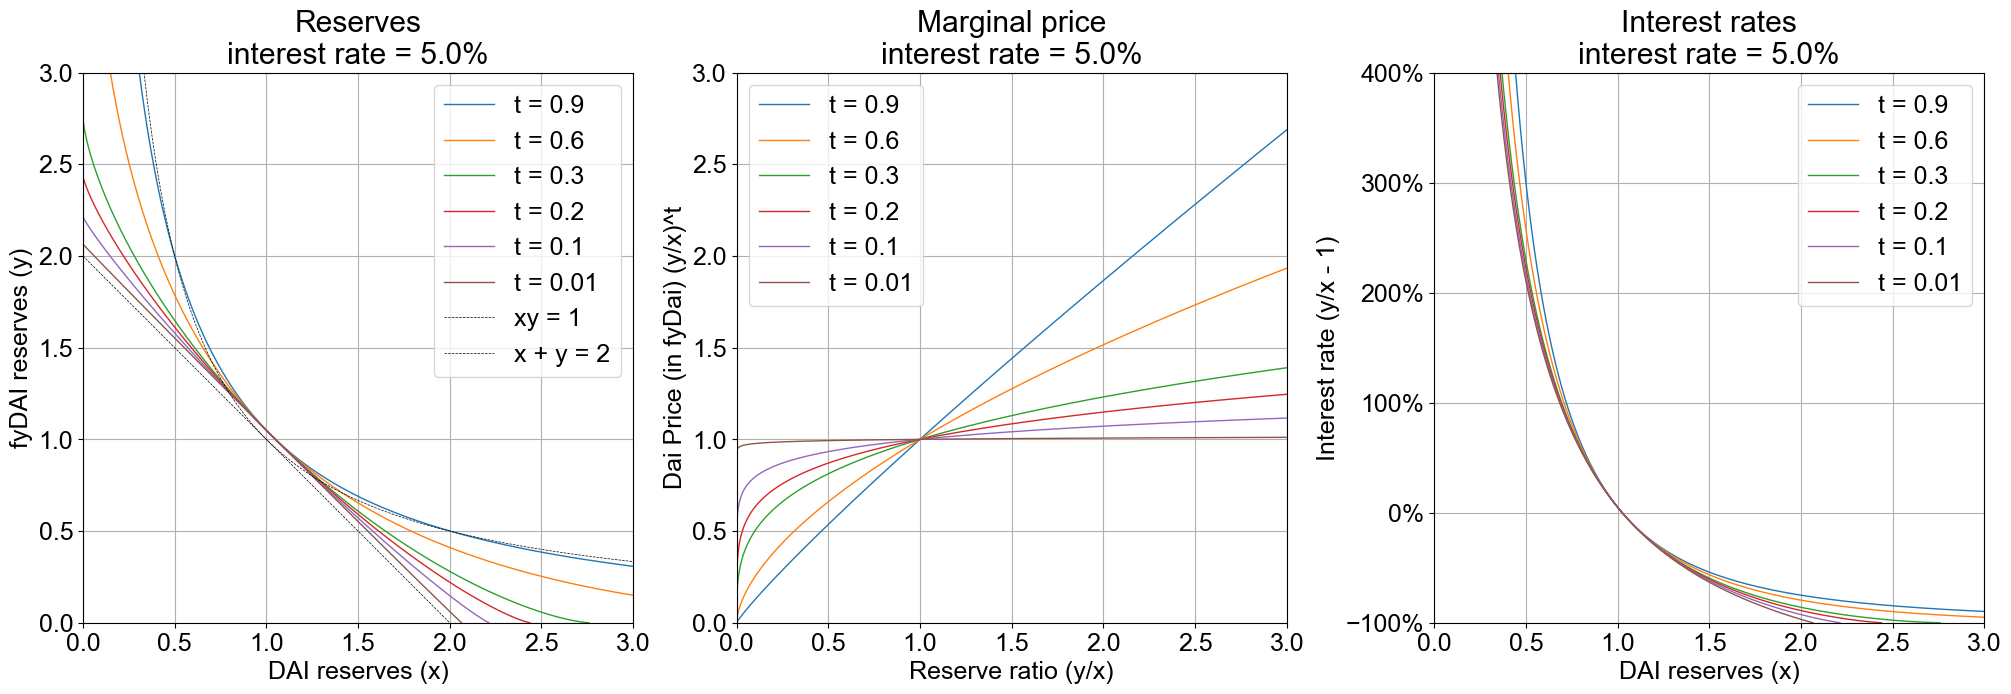

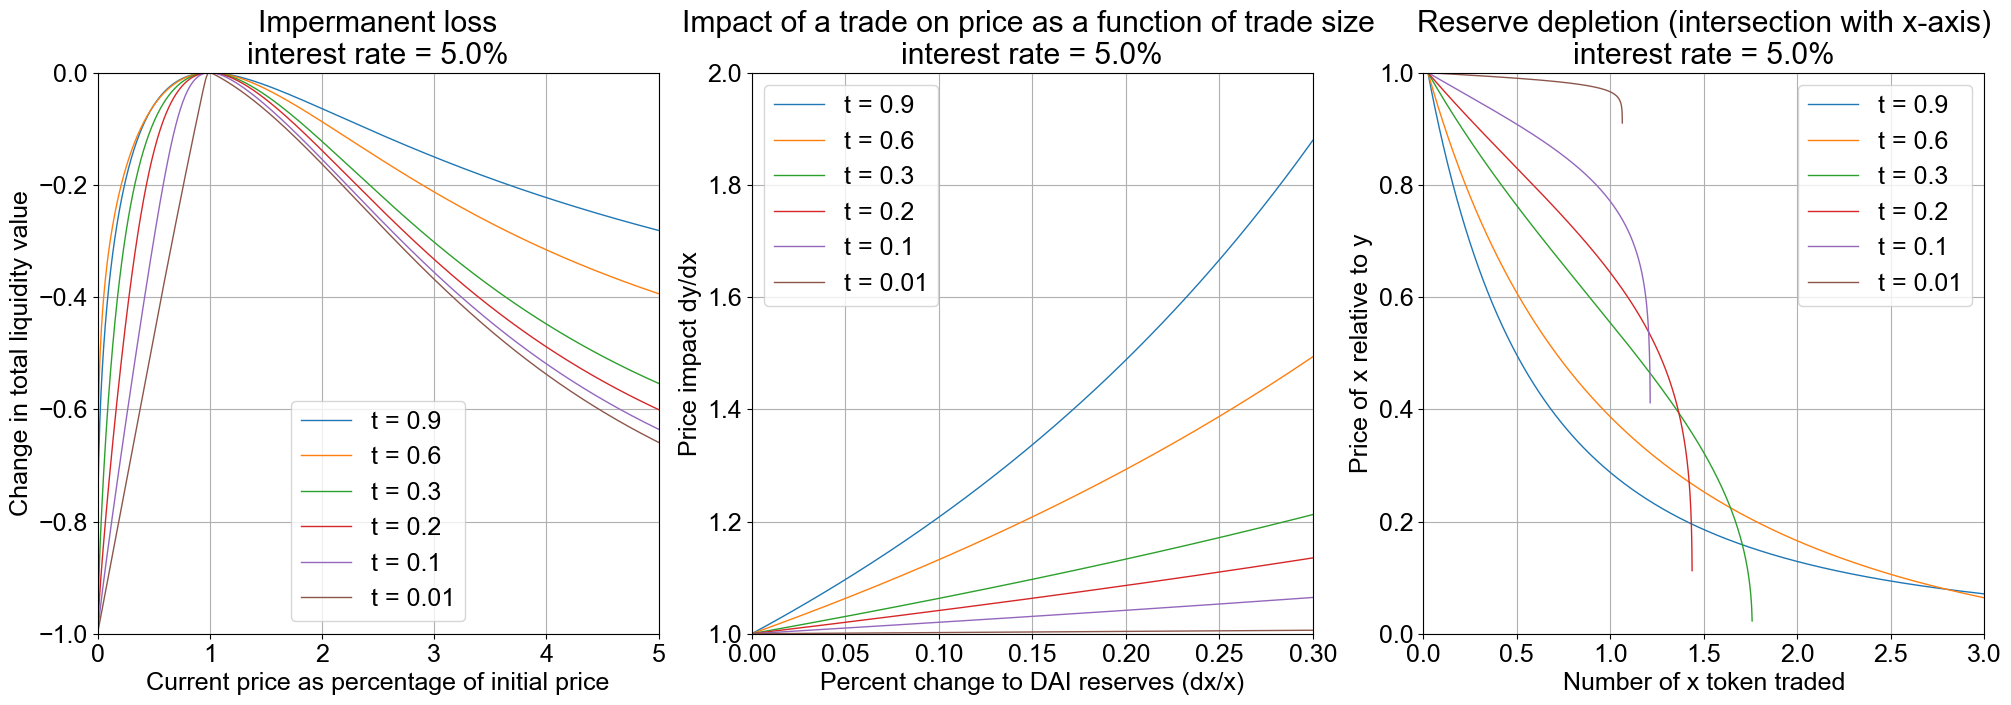

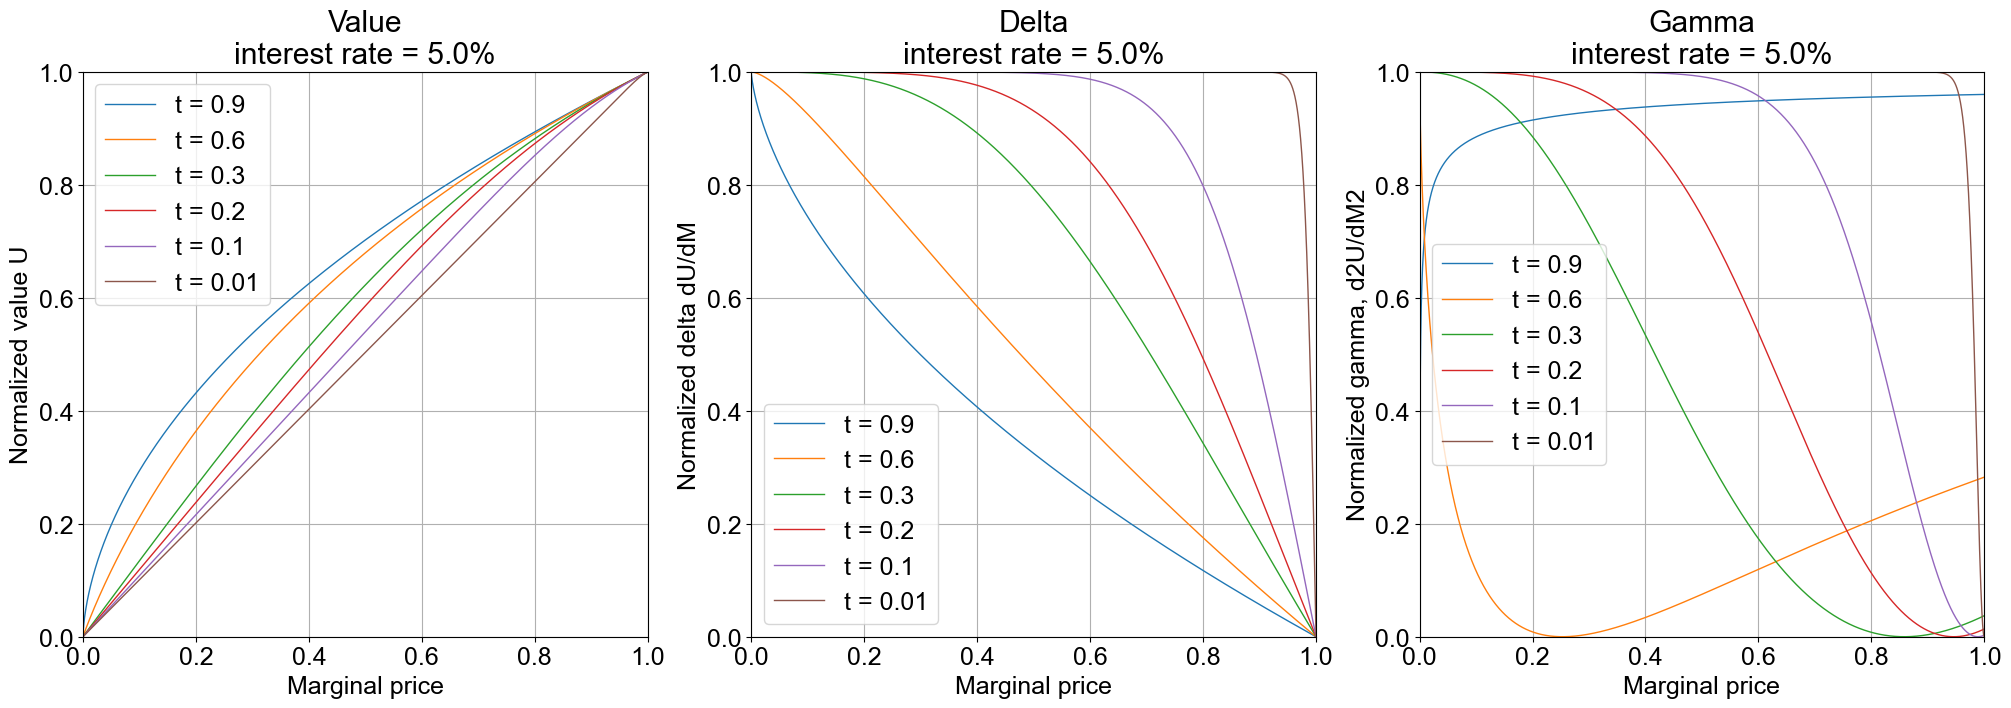

In [339]:
# YieldSpace paper plots

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,20), layout="constrained")

# calculations

for t in times:
    k = x_0**(1-t) + y_0**(1-t)
    
    y = (k - x**(1-t))**(1/(1-t)) # x**(1-t) + y**(1-t) = k;
    ax1.plot(x, y, linewidth = 1.0)
    
    marginalPrice = (((k - x**(1-t))**(1/(1-t))) / x)**t # marginalPrice = (y/x)^t
    # ax2.plot(x, marginalPrice, linewidth = 1.0) # x axis like in YieldSpace paper; x-axis is Dai reserves
    ax2.plot(y/x, marginalPrice, linewidth = 1.0) # x axis like in constant power root paper; x-axis is reserve ratio y/x

    interestRate = (((k - x**(1-t))**(1/(1-t))) / x) - 1 # interestRate = y/x - 1
    ax3.plot(x, interestRate * 100, linewidth = 1.0)

ax1.plot(x, 1/x, 'k--', linewidth = 0.5) # constant product for reference
ax1.plot(x, 2-x, 'k--', linewidth = 0.5) # constant sum for reference



# parameters of the plots

ax1.set_xlim([0, 3])
ax1.set_ylim([0, 3])
ax1.grid()
ax1.set_aspect(1.0)

ax2.set_xlim([0, 3])
ax2.set_ylim([0, 3])
ax2.grid()
ax2.set_aspect(1.0)

ax3.set_xlim([0, 3])
ax3.set_ylim([-100, 400])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.grid()
ax3.set_aspect(3/500)

# generate legend
legendValues = []
for i in range(len(times)):
    legendValues.append('t = ' + str(times[i]))
legendValues.append('xy = 1')
legendValues.append('x + y = 2')
ax1.legend(legendValues)
ax2.legend(legendValues)
ax3.legend(legendValues)

ax1.set_xlabel('DAI reserves (x)')
ax1.set_ylabel('fyDAI reserves (y)')
ax1.set_title('Reserves\n' + 'interest rate = ' + str(r * 100) + '%')

# ax2.set_xlabel('DAI reserves (x)')
ax2.set_xlabel('Reserve ratio (y/x)')
ax2.set_ylabel('Dai Price (in fyDai) (y/x)^t')
ax2.set_title('Marginal price\n' + 'interest rate = ' + str(r * 100) + '%')

ax3.set_xlabel('DAI reserves (x)')
ax3.set_ylabel('Interest rate (y/x - 1)')
ax3.set_title('Interest rates\n' + 'interest rate = ' + str(r * 100) + '%')

plt.show()




# constant power root market makers plots

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,20), layout="constrained")

# calculations

alpha = np.linspace(0, 50, 10000) # positive change in marginal price, if marginal price M, then new marginal price M' = alpha * M
dx = np.linspace(0, 10000, 10000)

for t in times:
    k = x_0**(1-t) + y_0**(1-t)
    y = (k - x**(1-t))**(1/(1-t)) # x**(1-t) + y**(1-t) = k;

    marginalPrice = (((k - x**(1-t))**(1/(1-t))) / x)**t # marginalPrice = (y/x)^t, marginal price represents the price of one token in terms of the other assuming an infinitesimally small trade
    impermanentLoss = ((alpha * marginalPrice + (alpha * marginalPrice)**(1/t)) / (alpha * marginalPrice + marginalPrice**(1/t)))*((1 + marginalPrice**(1/t - 1)) / (1 + (alpha * marginalPrice)**(1/t - 1)))**(1/(1-t)) - 1
    
    ax1.plot(alpha, impermanentLoss, linewidth = 1.0)

    x_pool = 10000;
    y_pool = 10000;
    dx = np.linspace(0, 10000, 10000)
    priceImpact = ((x_pool**(1-t) + y_pool**(1-t) - (x_pool - dx)**(1-t))**(t/(1-t))) / (x_pool - dx)**t
    ax2.plot(dx/x_pool, priceImpact, linewidth = 1.0)

    dx = np.linspace(0, 5, 10000)
    ax3.plot(x-1, marginalPrice, linewidth = 1.0)
    
    
# parameters of the plots

ax1.set_xlim([0, 5])
ax1.set_ylim([-1, 0])
ax1.grid()
ax1.set_aspect(5)

ax2.set_xlim([0, 0.3])
ax2.set_ylim([1, 2])
ax2.grid()
ax2.set_aspect(0.3/1)

ax3.set_xlim([0, 3])
ax3.set_ylim([0, 1])
ax3.grid()
ax3.set_aspect(3.0)


# generate legend
legendValues = []
for i in range(len(times)):
    legendValues.append('t = ' + str(times[i]))
legendValues.append('xy = 1')
legendValues.append('x + y = 2')
ax1.legend(legendValues)
ax2.legend(legendValues)
ax3.legend(legendValues)

ax1.set_xlabel('Current price as percentage of initial price')
ax1.set_ylabel('Change in total liquidity value')
ax1.set_title('Impermanent loss\n' + 'interest rate = ' + str(r * 100) + '%')

ax2.set_xlabel('Percent change to DAI reserves (dx/x)')
ax2.set_ylabel('Price impact dy/dx')
ax2.set_title('Impact of a trade on price as a function of trade size \n' + 'interest rate = ' + str(r * 100) + '%')

ax3.set_xlabel('Number of x token traded')
ax3.set_ylabel('Price of x relative to y')
ax3.set_title('Reserve depletion (intersection with x-axis)\n' + 'interest rate = ' + str(r * 100) + '%')

plt.show()




# second half of plots from power root paper
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,20), layout="constrained")

marginalPrice = np.linspace(0, 1, 10000)

# calculations
for t in times:
    k = x_0**(1-t) + y_0**(1-t)
    
    value = k * marginalPrice * (1 + marginalPrice**(1/t - 1))**(t/(t-1))
    value = value / max(value)
    ax1.plot(marginalPrice, value, linewidth = 1.0)
    
    delta = - k * (1 + marginalPrice**(1 - 1/t))**(1/(t-1))    # seems the equation from the paper was missing a minus, added
    delta = delta - min(delta)
    delta = delta / max(delta)
    ax2.plot(marginalPrice, delta, linewidth = 1.0)
    
    gamma = -(marginalPrice**(1/t - 1) * (1 + marginalPrice**(1/t - 1))**(1/(t-1) - 1))/t
    gamma = gamma - min(gamma)
    gamma = gamma / max(gamma)
    ax3.plot(marginalPrice, gamma, linewidth = 1.0)


# parameters of the plots

ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.grid()
ax1.set_aspect(1)

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.grid()
ax2.set_aspect(1)

ax3.set_xlim([0, 1])
ax3.set_ylim([0, 1])
ax3.grid()
ax3.set_aspect(1)

# generate legend
legendValues = []
for i in range(len(times)):
    legendValues.append('t = ' + str(times[i]))
legendValues.append('xy = 1')
legendValues.append('x + y = 2')
ax1.legend(legendValues)
ax2.legend(legendValues)
ax3.legend(legendValues)

ax1.set_xlabel('Marginal price')
ax1.set_ylabel('Normalized value U')
ax1.set_title('Value\n' + 'interest rate = ' + str(r * 100) + '%')

ax2.set_xlabel('Marginal price')
ax2.set_ylabel('Normalized delta dU/dM')
ax2.set_title('Delta\n' + 'interest rate = ' + str(r * 100) + '%')

ax3.set_xlabel('Marginal price')
ax3.set_ylabel('Normalized gamma, d2U/dM2')
ax3.set_title('Gamma\n' + 'interest rate = ' + str(r * 100) + '%')

plt.show()

In [327]:
# can yieldspace even work if resources are often depleted? they say in the power root market maker that Clipper protocol only allowed small trades for this reason
# the yieldspace paper then discusses adding fee mechanism and corrections to use increase capital efficiency through virtual reserves, because as can be seen above, half of the liquidity appreas for negative interest rates, but it doesn't show plots
# some thoughts
# why should we start at xy = k for t = 1 (begining)
# we could start at higher curvature, like one from the "constant power root market makers" paper and then also trend towards constant sum
# or why not start at smaller curvate from the start, to avoid slippage? we don't need liquidity for all prices, as we know from the start, interest rates don't make sense to fluctuate towards crazy high values